## Implementation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Preparation

In [2]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

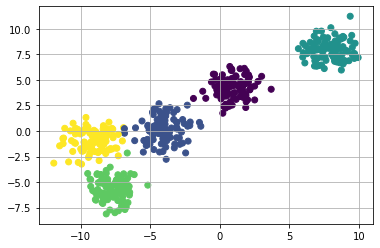

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

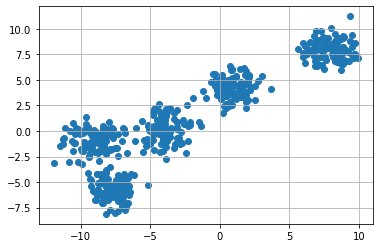

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
plt.show()

### Unsupervised Learning Algorithm ->K means Clustering

In [5]:
k=5
color=["green","red", "blue","yellow","orange"]
clusters={}

for i in range(k):
    center =10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i]=cluster
    

In [6]:
clusters

{0: {'center': array([ 6.49869668, -2.76728095]),
  'points': [],
  'color': 'green'},
 1: {'center': array([5.93968725, 1.05556722]), 'points': [], 'color': 'red'},
 2: {'center': array([4.40424531, 1.67065842]), 'points': [], 'color': 'blue'},
 3: {'center': array([-6.49330788,  4.27944014]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 6.83487465, -5.04582056]),
  'points': [],
  'color': 'orange'}}

In [7]:
 #center =10*(2*np.random.random((X.shape[1],))-1)
 #print(center)


* Note-> np.random,random((x,y))  
* It generates a tuple of size(x,y) with values between [0.0,1.0)

In [8]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [9]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#distance(v1,v2)

* E step  ->Assign every data point to one of the clusters
* M step  ->Updating every cluster center according to the mean of points in it

In [15]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

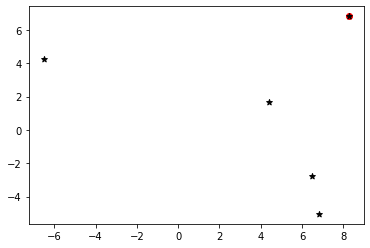

In [16]:
assignPointstoClusters(clusters)
plotClusters(clusters)

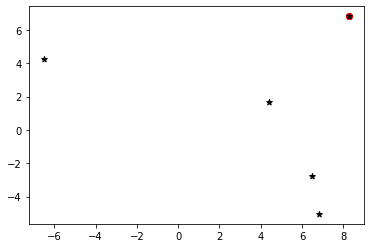

In [17]:
assignPointstoClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [22]:
for i in range(100):
    assignPointstoClusters(clusters)
    #plotClusters(clusters)
    updateClusters(clusters)

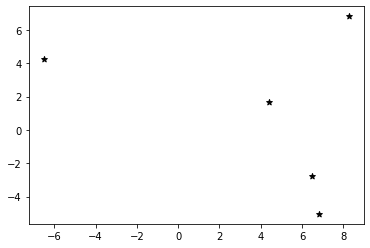